<a href="https://colab.research.google.com/github/ifeanyiokala/-collectio-mea/blob/master/Hough_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
# Do relevant imports 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np 
import cv2

In [66]:
 # Read in and grayscale the image
 image = mpimg.imread('cannyedge.jpg')
 gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY) 

In [67]:
 # Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

In [68]:
# Define our parameters for Canny and apply 
low_threshold = 30 
high_threshold = 100
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

In [69]:
# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)
ignore_mask_color = 255

In [70]:
#This time we are defining a four sided polygon to mask 
imshape = image.shape
vertices = np.array([[(50,imshape[0]),(420,300), (520,300), (900,imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges,mask)


In [71]:
# Define the Hough transform paramters 
# Make a blank the same size as our iage to draw on 
rho = 1
theta = np.pi/180
threshold = 2 
min_line_lenght = 4
max_line_gap = 5
line_image = np.copy(image)*0 #creating a blank to draw lines on 

In [72]:
#Run Hough on edge detected image 
lines = cv2.HoughLinesP(masked_edges, rho,theta, threshold, np.array([]),
                        min_line_lenght, max_line_gap)

In [73]:
# Iterate over the output "lines" and draw lines on the blank 
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

In [74]:
# Create a "color" binary image to combine with line image 
color_edges = np.dstack((edges, edges, edges))

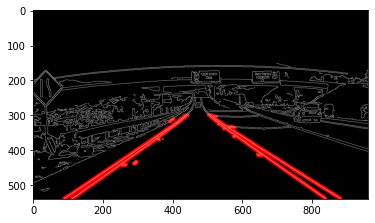

In [75]:
# Draw the lines on the edge image 
combo = cv2.addWeighted(color_edges, 0.8,line_image, 1, 0)
plt.imshow(combo)